## <font color= blue> **Project Portfolio** </blue>

#### <font color = blue> *By [Simran Padam](https://github.com/simran-padam).* This notebook summarizes the list of projects attempted in GR5074 Advanced Machine Learning course.</font> 


+ <font color = blue>  **World Happiness Prediction** </font>
+ <font color = blue>  **Covid19 Image Classification** </font>
+ <font color = blue>  **SST Text Classification** </font>

### <font color = green> 1.  Project :  [World Happiness Prediction](https://github.com/simran-padam/AdvML-project-portfolio/blob/main/Project1/World%20Happiness%20Report%20-%20sdp2158.ipynb) </font>

*This uses Ensemble learning methods - <u> Random Forest and Gradient Boosting</u>  and Deep Learning - <u> Keras Sequential</u>.*

In [3]:
import pandas as pd
world_happiness_X = pd.read_csv("/content/X_train.csv")
world_happiness_y = pd.read_csv("/content/y_train.csv")
world_happiness_X.head(2)

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111


In [4]:
world_happiness_y.head(2)

,Average,High,Low,Very High,Very Low
0,1,0,0,0,0
1,0,1,0,0,0


#### *Insights from the analysis*

*   *World Happiness is a <u> tabular data </u>  containing categorical and numeric variables with a multiclass response variable (balanced).*
*   *Most models were able to achieve high precision. High Precision and Low Recall means False negatives are high.*
*   *Feature selection also helped in boosting the model performance. Removing highly correlated variables and irrelevant features improved model performance on the leaderboard.*
* *Random Forest Classifier produced best results making to the Top 5 on the leaderboard achieved a F1 score of 53.94%. <u> Best parameters were obtained from GridSearchCV. </u> Hyperparameters tuning for <u> min_samples_split and min_samples_leaf </u> improved the model rank.*



In [5]:
#Competition review
worldhappiness = pd.read_csv("/content/worldhappiness.csv")
worldhappiness.head(2)

,Unnamed: 0,accuracy,f1_score,precision,recall,ml_framework,deep_learning,model_type,depth,num_params,...,relu_act,tanh_act,softmax_act,loss,optimizer,memory_size,team,username,timestamp,version
0,0,0.558824,0.539683,0.789773,0.592857,sklearn,NaN,RandomForestClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stellawong,2023-02-07 21:35:40.563162,885
1,1,0.558824,0.539394,0.682145,0.581429,sklearn,NaN,RandomForestClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6,sdp2158,2023-02-06 19:39:59.372410,510


In [21]:
#type of models used 
df= pd.DataFrame(worldhappiness.model_type.value_counts()/len(worldhappiness)).head(5)
df.style.format({'model_type': "{:.1%}"})

,model_type
RandomForestClassifier,39.7%
GradientBoostingClassifier,28.3%
Sequential,17.5%
SVC,6.5%
LogisticRegression,2.3%


In [37]:
worldhappiness.loc[:,["accuracy", "f1_score", "model_type"]].groupby("model_type").agg(["mean"]).reset_index().sort_values(by=[(  'accuracy', 'mean'),
            (  'f1_score', 'mean')],ascending = False)

,model_type,accuracy,f1_score
,,mean,mean
1,DecisionTreeClassifier,0.500000,0.476616
0,BaggingClassifier,0.486425,0.475310
9,SVC,0.474446,0.466585
13,unknown,0.470588,0.459740
8,RidgeClassifier,0.470588,0.450271
6,LogisticRegression,0.463904,0.448965
2,ExtraTreesClassifier,0.463235,0.427582
3,GaussianNB,0.447712,0.422746
7,RandomForestClassifier,0.446445,0.428656


In [27]:
worldhappiness.groupby('ml_framework').agg({'accuracy':'max', 'f1_score':'max','precision':'max', 'recall': 'max'})[['accuracy','f1_score', 'precision', 'recall']].reset_index()

,ml_framework,accuracy,f1_score,precision,recall
0,keras,0.588235,0.559533,0.693939,0.587143
1,sklearn,0.588235,0.576515,0.789773,0.595000
2,unknown,0.470588,0.459740,0.509235,0.495714
3,xgboost,0.470588,0.433559,0.700000,0.495714


#### *Insights from the competition*

*   *Ensemble methods such as RFC, GBC are mostly used in the competition by other users accounting to approx. 70%.*
* *Comparing the accuracy and f1 score of all models, highest average is DecisionTreeClassifier and Bagging Classifier.*
* *Comparing different ML frameworks, keras has the maximum accuracy on the leaderboard whereas sklearn has a better f1 score.*


### <font color = green> 2.  Project :  [Covid19 Image Classification](https://github.com/simran-padam/AdvML-project-portfolio/blob/main/Project2/COVID%20Positive%20Image%20Classification.ipynb)  </font>

*This uses Tensorflow Keras <u> Sequential, Functional API, Squeeze Net, VGG16 and VGG19</u>.*

In [42]:
%%capture
# Import data and unzip files to folder
!unzip /content/drive/MyDrive/COVID-19_Radiography_Dataset.zip

In [40]:
# Connect to google drive
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

# Extracting all filenames iteratively
base_path = 'COVID-19_Radiography_Dataset'
categories = ['COVID/images', 'Normal/images', 'Viral Pneumonia/images']

# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

In [45]:
from keras.preprocessing import image
import numpy as np
from PIL import Image

def preprocessor(img_path):
        img = Image.open(img_path).convert("RGB").resize((192,192)) # import image, make sure it's RGB and resize to height and width you want.
        img = (np.float32(img)-1.)/(255-1.) # min max transformation
        img=img.reshape((192,192,3)) # Create final shape as array with correct dimensions for Keras
        return img

preprocessor('COVID-19_Radiography_Dataset/COVID/images/COVID-2273.png').shape

(192, 192, 3)

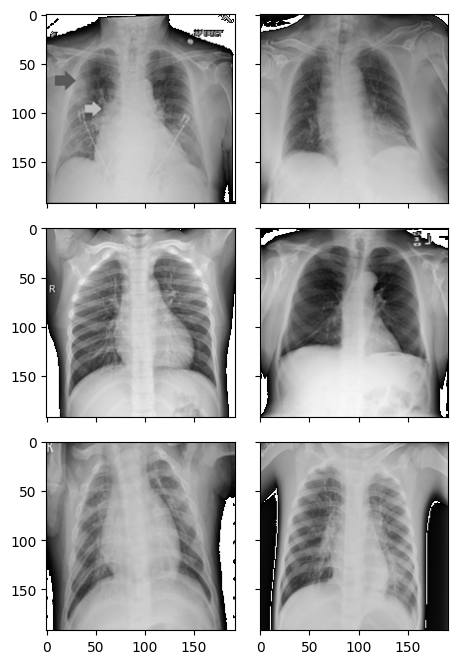

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random

cov_img1 = preprocessor(fnames[0][20])
cov_img2 = preprocessor(fnames[0][40])
norm_img1 = preprocessor(fnames[1][30])
norm_img2 = preprocessor(fnames[1][50])
pneum_img1 = preprocessor(fnames[2][10])
pneum_img2 = preprocessor(fnames[2][30])

fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3,2),  # creates 2x2 grid of axes
                 axes_pad=0.25,  # pad between axes in inch.
                 )
for ax, im in zip(grid, [cov_img1, cov_img2, norm_img1, norm_img2, pneum_img1, pneum_img2]):
    ax.imshow((im * 255).astype(np.uint8))
plt.show()

#### *Insights from the analysis*

*   *The data contains X-rays images of each of the three categories : Covid (Row1), Normal(Row2)and Viral Pneumonia (Row3) respectively*
*  *Key takeaway from the analysis is use of batch normalization, kernel regulizers (L1 and L2) in the Sequential keras model decreased the training accuracy by almost half.*
* *Squeezenet (fire modules) resulted in high training accuracy but low validation accuracy. Overfitting was attempted to be resolved using Batch Normalisation and Dropout. However, results did not improve much.*
* *VGG19 performed better in comparison to VGG16. As the model results show training accuracy is increasing in 4 epochs run.*
* *Sequential Keras model using he_normal initializers resulted best performance on the leaderboard*



In [47]:
#Competition review
covidxr = pd.read_csv("/content/covid-xray.csv")
covidxr.head(2)

,ACCURACY,F1_SCORE,PRECISION,RECALL,ML_FRAMEWORK,TRANSFER_LEARNING,DEEP_LEARNING,MODEL_TYPE,DEPTH,NUM_PARAMS,...,SELU_ACT,RELU_ACT,SOFTMAX_ACT,LOSS,OPTIMIZER,MEMORY_SIZE,TEAM,USERNAME,TIMESTAMP,VERSION
0,0.963594,0.963655,0.963831,0.963582,unknown,NaN,NaN,unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,francesyang,2023-03-06 22:24:23.991057,23
1,0.962820,0.962653,0.963049,0.962801,unknown,NaN,NaN,unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,francesyang,2023-03-06 22:17:54.696299,22


In [52]:
covidxr.TRANSFER_LEARNING.fillna("False", inplace=True)
covidxr.groupby(["TRANSFER_LEARNING"]).agg({'ACCURACY':'max', 'F1_SCORE':'max','PRECISION':'max', 'RECALL': 'max'})[['ACCURACY','F1_SCORE', 'PRECISION', 'RECALL']].reset_index()

,TRANSFER_LEARNING,ACCURACY,F1_SCORE,PRECISION,RECALL
0,True,0.952750,0.952791,0.953372,0.952738
1,False,0.963594,0.963655,0.963831,0.963582


In [53]:
covidxr.groupby(["TRANSFER_LEARNING"]).agg({'ACCURACY':'min', 'F1_SCORE':'min','PRECISION':'min', 'RECALL': 'min'})[['ACCURACY','F1_SCORE', 'PRECISION', 'RECALL']].reset_index()

,TRANSFER_LEARNING,ACCURACY,F1_SCORE,PRECISION,RECALL
0,True,0.332301,0.166279,0.110853,0.332558
1,False,0.181255,0.120130,0.090274,0.181388


<Axes: xlabel='AVERAGEPOOLING2D_LAYERS', ylabel='ACCURACY'>

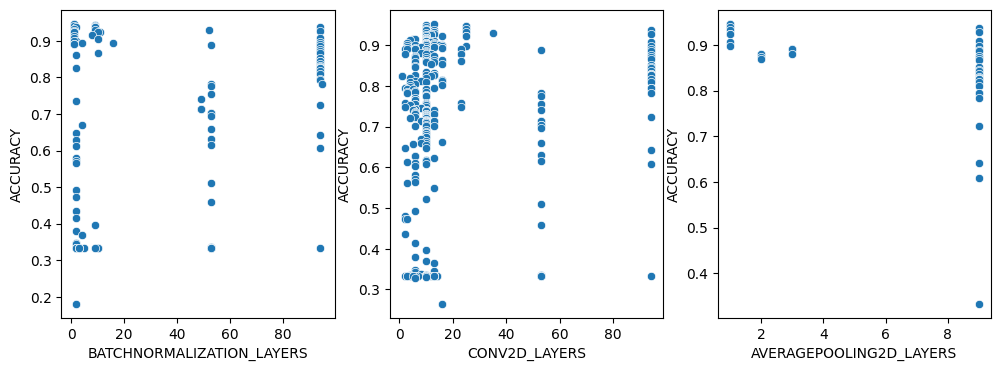

In [62]:
import seaborn as sns
fig,ax = plt.subplots(1,3,figsize=(12,4))

sns.scatterplot(x = covidxr.BATCHNORMALIZATION_LAYERS, y= covidxr.ACCURACY, ax=ax[0])
sns.scatterplot(x = covidxr.CONV2D_LAYERS, y= covidxr.ACCURACY, ax=ax[1])
sns.scatterplot(x = covidxr.AVERAGEPOOLING2D_LAYERS, y= covidxr.ACCURACY, ax=ax[2])

<Axes: xlabel='GLOBALAVERAGEPOOLING2D_LAYERS', ylabel='ACCURACY'>

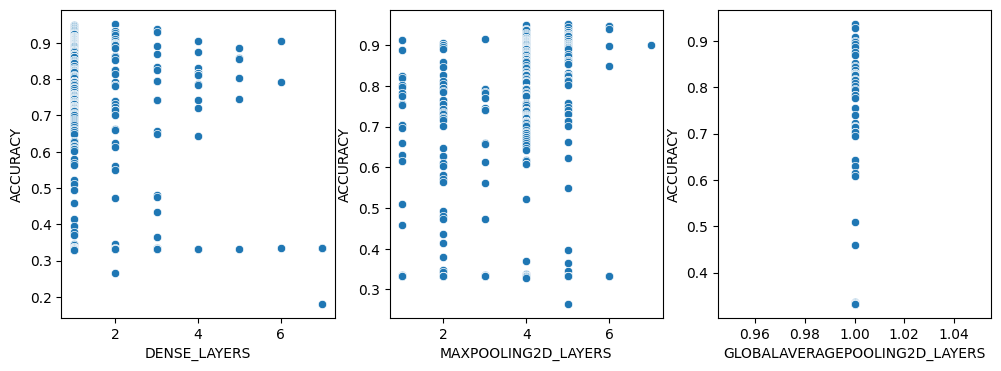

In [63]:
import seaborn as sns
fig,ax = plt.subplots(1,3,figsize=(12,4))

sns.scatterplot(x = covidxr.DENSE_LAYERS, y= covidxr.ACCURACY, ax=ax[0])
sns.scatterplot(x = covidxr.MAXPOOLING2D_LAYERS, y= covidxr.ACCURACY, ax=ax[1])
sns.scatterplot(x = covidxr.GLOBALAVERAGEPOOLING2D_LAYERS, y= covidxr.ACCURACY, ax=ax[2])

#### *Insights from the competition*

*   *Maximum accuracy of prediction with and without transfer learning is almost similar.*
*   *Minimum accuracy of prediction with and without transfer learning is varied. Transfer learning leads to higher accuracy which intuitively makes sense.*
*   *No clear interpretation of the relationship between the type of layer and accuracy can be drawn from the plots.*

### <font color = green> 3.  Project :  [SST Text Classification](https://github.com/simran-padam/AdvML-project-portfolio/blob/main/Project3/Text%20Classification.ipynb)</font>

*This uses <u> LSTM, RNN, Conv1D</u> with own and pretrained embeddings such as Glove.*

In [1]:
%%capture
! pip install aimodelshare==0.0.189

from aimodelshare import download_data
download_data('public.ecr.aws/y2e2a1d6/sst2_competition_data-repository:latest') 

In [3]:
# Set up X_train, X_test, and y_train_labels objects
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=Warning)

X_train=pd.read_csv("sst2_competition_data/X_train.csv", squeeze=True)
y_train_labels=pd.read_csv("sst2_competition_data/y_train_labels.csv", squeeze=True)

y_train = pd.get_dummies(y_train_labels)
X_train.head(2)

0    The Rock is destined to be the 21st Century 's...
1    The gorgeously elaborate continuation of `` Th...
Name: text, dtype: object

In [4]:
y_train.head(2)

,Negative,Positive
0,0,1
1,0,1


#### *Insights from the analysis*

*   *The textual dataset contains 6920 movie reviews with two sentiments : negative and positive. The dataset is almost balanced (52% Positives and 48% Negatives Sentiments).*
*   *Using own embeddings, doubling the size of vocabulary boosted the model performance on the leaderboard, the rank of the model improved significantly. Whereas, doubling the input length (length of the sentence) deteriorated model performance in this particular analysis.* 
*  *Different optimizers were tried to see improvement in model performance. RMSProp optimizer gave the best results* 
*  *Pretrained Glove embeddings with 100 features and 25000 vocabulary size produced good results. However, the maximum accuracy on the leaderboard was achieved by using two dense layers and sigmoid activation function making it to the top 5 on leaderboard.*



In [5]:
sstsentiment = pd.read_csv("/content/sstsentiment.csv")

<Axes: xlabel='depth', ylabel='accuracy'>

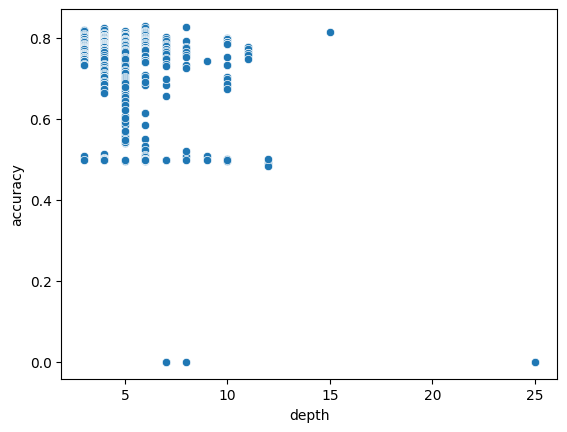

In [7]:
import seaborn as sns
temp = sstsentiment.loc[sstsentiment.model_type == "Sequential",]
sns.scatterplot(data =temp, y =temp["accuracy"], x =temp["depth"])

<Axes: xlabel='lstm_layers', ylabel='f1_score'>

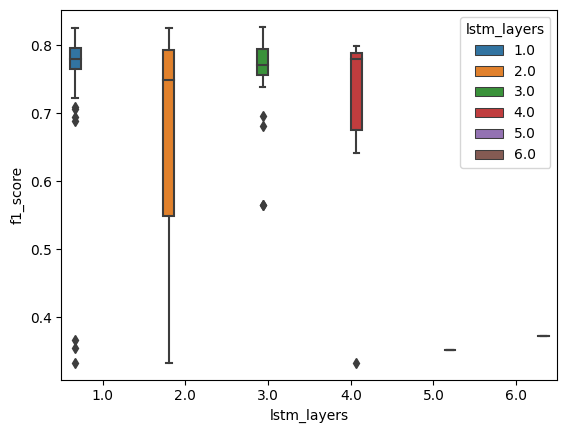

In [8]:
sns.boxplot(data = sstsentiment, x = "lstm_layers", y = "f1_score", hue = "lstm_layers" )

<Axes: xlabel='dense_layers', ylabel='accuracy'>

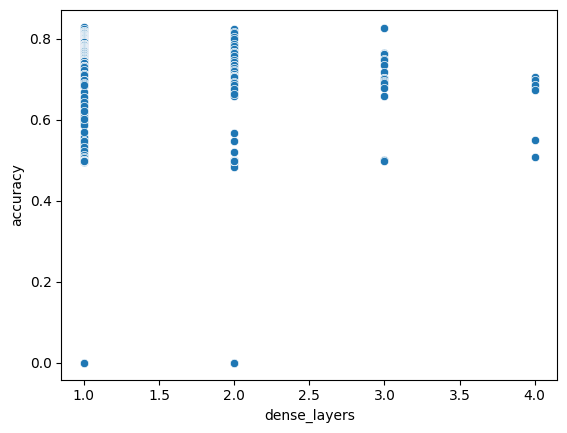

In [11]:
sns.scatterplot(data =sstsentiment, y =sstsentiment["accuracy"], x =sstsentiment["dense_layers"])


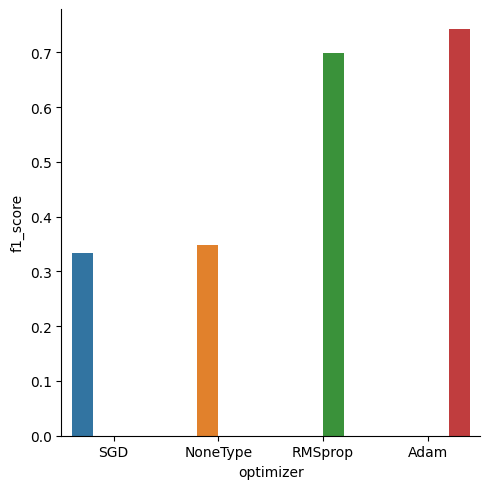

In [12]:
sstsentiment1= sstsentiment.groupby(["optimizer"])["f1_score", "accuracy"].mean().reset_index()
sns.catplot(data = sstsentiment1.sort_values("f1_score"), x= "optimizer", y = "f1_score", hue = "optimizer", kind="bar")

<Axes: xlabel='optimizer', ylabel='f1_score'>

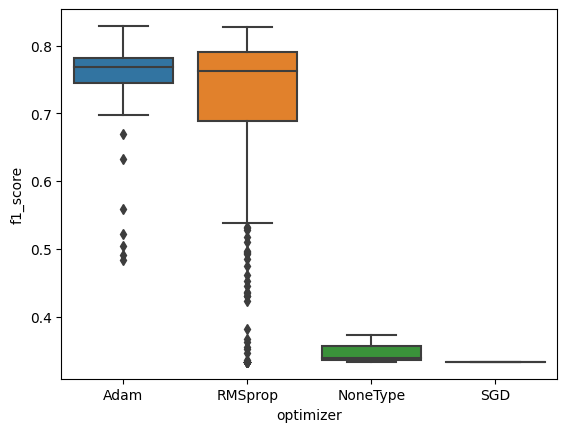

In [13]:
sns.boxplot(x = "optimizer", y = "f1_score", data =sstsentiment)

#### *Insights from the competition*

*   *For Sequential models, the depth of layers has no correlation with accuracy (except for extreme high depth - seems like an outlier).*

*   *In a boxplot, 3 LSTM layers is giving better results showing not much variation.*
*   *Based on catplot and boxplot, Adam optimizer provides better results in terms of accuracy.*